In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns; sns.set(color_codes=True)

In [100]:
pd.options.display.float_format = '{:20,.2f}'.format

In [101]:
df = pd.read_pickle('region_sector_funda_net_degree_3.pkl')

In [5]:
df_rank = df[['year_0','cusip_9','out_degree_0','out_diff']]

In [7]:
df_rank['out_diff_ratio'] = df_rank['out_diff']/df_rank['out_degree_0']

I:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
df_rank = df_rank.replace([np.inf, -np.inf], np.nan)

In [11]:
df_rank.to_csv('df_rank.csv')

In [18]:
df_rank.to_excel('df_rank.xlsx')

In [19]:
df = pd.DataFrame()
for i in range(12):
    #train_test_split
    year =  str(2004 + i) + '-06-30'
    df_exp = df_rank.loc[df_rank['year_0'] < year]
    df_unexp = df_rank.loc[df_rank['year_0'] == year]
    df_unexp['unexp_diff'] = df_unexp['out_diff'] - df_exp['out_diff'].mean()
    df = df.append(df_unexp)
    

I:\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [32]:
def group_trans(num):
        if num > 0: return 1
        elif num == 0: return 0
        else: return -1

In [33]:
df['unexp_group'] = df['unexp_diff'].map(group_trans)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63456 entries, 0 to 63455
Columns: 142 entries, cusip_9 to Western Non-European Union
dtypes: datetime64[ns](1), float64(85), int64(1), object(6), uint8(49)
memory usage: 48.5+ MB


In [103]:
df.head()

,cusip_9,out_degree_centrality,in_degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality,harmonic_centrality,average_neighbor_degree,square_clustering,core_number,...,Pacific Islands,South America,Southern Africa,Southern European Union,Southern Non-European Union,United States and Canada,Western Africa,Western European Union,Western Middle East,Western Non-European Union
0,000360206,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,3.00,...,0,0,0,0,0,0,0,0,1,0
1,000360206,0.00,0.00,0.00,0.00,0.00,0.00,1.67,0.00,3.00,...,0,0,0,0,0,0,0,0,1,0
2,000360206,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,2.00,...,0,0,0,0,0,0,0,0,1,0
3,000360206,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,1.00,...,0,0,0,0,0,0,0,0,1,0
4,000361105,0.00,0.00,0.14,0.00,0.01,548.42,0.00,0.00,1.00,...,0,0,0,0,0,0,0,0,1,0


In [104]:
network = ['out_degree_centrality','in_degree_centrality','closeness_centrality','betweenness_centrality','eigenvector_centrality','harmonic_centrality','average_neighbor_degree','square_clustering','core_number','pagerank',
'hubs','authorities','in_degree_0','out_degree_0']

In [105]:
funda = ['FF_ASSETS', 'FF_ASSETS_CURR_OTH', 'FF_ASSETS_OTH', 'FF_ASSET_TURN','FF_BPS_TANG', 'FF_CAPEX', 'FF_CAPEX_SALES', 'FF_COGS','FF_COM_EQ_ASSETS', 'FF_CURR_RATIO', 'FF_DEBT_ASSETS', 'FF_DEBT_CF','FF_DEBT_EBITDA_OPER',
'FF_EBITDA_OPER', 'FF_EBIT_OPER','FF_ENTRPR_VAL', 'FF_EPS_DIL', 'FF_EPS_DIL_BEF_UNUSUAL','FF_FIN_ACTIV_OTH_CF', 'FF_FIN_CF', 'FF_FREE_CF', 'FF_GROSS_MGN','FF_INT_EXP_NET','FF_INVEST_ADV', 'FF_INVEST_CF', 'FF_INVEST_PURCH_SALE_CF',
'FF_INVEST_USES_CF', 'FF_LIABS', 'FF_LIABS_CURR_OTH', 'FF_LIABS_OTH','FF_MISC_FUNDS_CF', 'FF_MKT_VAL', 'FF_NET_DEBT','FF_NET_INC', 'FF_NET_INC_AFT_XORD', 'FF_NET_INC_BASIC', 'FF_NET_MGN', 'FF_NON_OPER_INC', 'FF_OPER_CF', 
'FF_OPER_MGN', 'FF_PAY_OUT_RATIO', 'FF_PBK','FF_PCF', 'FF_PE', 'FF_PSALES', 'FF_PTX_MGN', 'FF_QUICK_RATIO','FF_ROA', 'FF_ROE', 'FF_ROTC', 'FF_SALES_PS', 'FF_SGA','FF_SGA_OTH_EXP', 'FF_STK_CHG_CF', 'FF_TCAP', 'FF_TURN_RATE','FF_UNUSUAL_EXP']

In [106]:
sector = ['SECTOR_CODE1200','SECTOR_CODE1300','SECTOR_CODE1400','SECTOR_CODE2100','SECTOR_CODE2200','SECTOR_CODE2300','SECTOR_CODE2400','SECTOR_CODE3100','SECTOR_CODE3200','SECTOR_CODE3250','SECTOR_CODE3300','SECTOR_CODE3350','SECTOR_CODE3400',
 'SECTOR_CODE3500','SECTOR_CODE4600','SECTOR_CODE4700','SECTOR_CODE4800','SECTOR_CODE4900','SECTOR_CODE6000']

In [107]:
region = ['Africa and Middle East Unallocated Area','Americas Unallocated Revenue Area','Area Unspecified','Asia/Pacific Unallocated Area','Australia and New Zealand','Caribbean','Central America','Central Middle East',
 'Eastern Africa','Eastern European Union','Eastern Middle East','Eastern Non-European Union','Europe Unallocated Area','Far East','Indian Region','Non-Geographic Revenue Area','Non-Operating Area','Northern European Union',
 'Northern Non-European Union','Pacific Islands','South America','Southern Africa','Southern European Union','Southern Non-European Union','United States and Canada','Western Africa','Western European Union','Western Middle East',
 'Western Non-European Union']

In [47]:
df_network = df[network]

In [62]:
print(df_network.describe().T.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &                count &                 mean &                  std &                  min &                  25\% &                  50\% &                  75\% &                  max \\
\midrule
out\_degree\_centrality   &            63,456.00 &                 0.00 &                 0.00 &                 0.00 &                 0.00 &                 0.00 &                 0.00 &                 0.05 \\
in\_degree\_centrality    &            63,456.00 &                 0.00 &                 0.00 &                 0.00 &                 0.00 &                 0.00 &                 0.00 &                 0.06 \\
closeness\_centrality    &            63,456.00 &                 0.07 &                 0.05 &                 0.00 &                 0.00 &                 0.09 &                 0.11 &                 0.20 \\
betweenness\_centrality  &            63,456.00 &                 0.00 &                 0.00 &                 0.00 &      

In [53]:
df_funda = df[funda]

In [79]:
df_funda.columns

Index(['FF_ASSETS', 'FF_ASSETS_CURR_OTH', 'FF_ASSETS_OTH', 'FF_ASSET_TURN',
       'FF_BPS_TANG', 'FF_CAPEX', 'FF_CAPEX_SALES', 'FF_COGS',
       'FF_COM_EQ_ASSETS', 'FF_CURR_RATIO', 'FF_DEBT_ASSETS', 'FF_DEBT_CF',
       'FF_DEBT_EBITDA_OPER', 'FF_EBITDA_OPER', 'FF_EBIT_OPER',
       'FF_ENTRPR_VAL', 'FF_EPS_DIL', 'FF_EPS_DIL_BEF_UNUSUAL',
       'FF_FIN_ACTIV_OTH_CF', 'FF_FIN_CF', 'FF_FREE_CF', 'FF_GROSS_MGN',
       'FF_INT_EXP_NET', 'FF_INVEST_ADV', 'FF_INVEST_CF',
       'FF_INVEST_PURCH_SALE_CF', 'FF_INVEST_USES_CF', 'FF_LIABS',
       'FF_LIABS_CURR_OTH', 'FF_LIABS_OTH', 'FF_MISC_FUNDS_CF', 'FF_MKT_VAL',
       'FF_NET_DEBT', 'FF_NET_INC', 'FF_NET_INC_AFT_XORD', 'FF_NET_INC_BASIC',
       'FF_NET_MGN', 'FF_NON_OPER_INC', 'FF_OPER_CF', 'FF_OPER_MGN',
       'FF_PAY_OUT_RATIO', 'FF_PBK', 'FF_PCF', 'FF_PE', 'FF_PSALES',
       'FF_PTX_MGN', 'FF_QUICK_RATIO', 'FF_ROA', 'FF_ROE', 'FF_ROTC',
       'FF_SALES_PS', 'FF_SGA', 'FF_SGA_OTH_EXP', 'FF_STK_CHG_CF', 'FF_TCAP',
       'FF_TURN_

In [96]:
df_funda_selected = df_funda[['FF_ROA','FF_ROE','FF_PE','FF_PBK', 'FF_PCF']]

In [97]:
df_funda_selected.describe()

,FF_ROA,FF_ROE,FF_PE,FF_PBK,FF_PCF
count,"62,741.00","60,746.00","45,883.00","58,640.00","49,411.00"
mean,-1.46,0.89,45.05,5.14,29.19
std,381.25,584.69,390.19,118.67,346.32
min,"-28,023.43","-44,041.55",0.00,0.00,0.00
25%,0.08,0.85,11.59,1.11,5.89
50%,3.20,8.91,17.26,1.83,10.16
75%,7.25,16.43,27.63,3.15,17.21
max,"83,151.22","80,743.03","37,400.20","19,736.80","56,815.50"


In [91]:
print(df_funda_selected.describe().to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &        FF\_ASSET\_TURN &               FF\_ROA &               FF\_ROE &                FF\_PE &               FF\_PBK &               FF\_PCF \\
\midrule
count &            62,727.00 &            62,741.00 &            60,746.00 &            45,883.00 &            58,640.00 &            49,411.00 \\
mean  &                 0.90 &                -1.46 &                 0.89 &                45.05 &                 5.14 &                29.19 \\
std   &                 1.95 &               381.25 &               584.69 &               390.19 &               118.67 &               346.32 \\
min   &                -0.41 &           -28,023.43 &           -44,041.55 &                 0.00 &                 0.00 &                 0.00 \\
25\%   &                 0.35 &                 0.08 &                 0.85 &                11.59 &                 1.11 &                 5.89 \\
50\%   &                 0.72 &                 3.20 &                

In [71]:
df_funda.describe()

,FF_ASSETS,FF_ASSETS_CURR_OTH,FF_ASSETS_OTH,FF_ASSET_TURN,FF_BPS_TANG,FF_CAPEX,FF_CAPEX_SALES,FF_COGS,FF_COM_EQ_ASSETS,FF_CURR_RATIO,...,FF_ROA,FF_ROE,FF_ROTC,FF_SALES_PS,FF_SGA,FF_SGA_OTH_EXP,FF_STK_CHG_CF,FF_TCAP,FF_TURN_RATE,FF_UNUSUAL_EXP
count,"63,357.00","55,302.00","63,327.00","62,727.00","63,111.00","63,151.00","62,216.00","57,451.00","63,348.00","55,308.00",...,"62,741.00","60,746.00","62,256.00","63,011.00","57,687.00","63,357.00","62,662.00","63,331.00","28,467.00","60,230.00"
mean,"987,483.21","13,366.37","34,561.14",0.90,"27,083.28","36,959.54",44.71,"304,388.04",-380.02,2.71,...,-1.46,0.89,1.80,"94,832.51","45,687.58","51,486.31","4,914.13","445,515.27","2,360,610.52",887.00
std,"14,079,118.52","163,950.28","556,509.74",1.95,"14,619,358.78","466,681.59","2,379.13","3,071,591.94","93,829.46",17.63,...,381.25,584.69,512.31,"11,944,777.78","599,057.17","626,874.67","156,259.43","4,533,040.86","375,041,634.78","65,831.31"
min,0.00,"-1,002.16","-18,932.02",-0.41,"-238,025,800.00",-3.54,-633.29,"-6,156.00","-23,554,237.50",0.00,...,"-28,023.43","-44,041.55","-20,596.01",-174.42,"-111,392.34","-16,428,323.00","-3,466,263.00","-253,667.34",0.00,"-5,957,966.00"
25%,340.67,3.16,0.39,0.35,0.82,7.43,1.93,124.50,26.81,1.11,...,0.08,0.85,0.22,3.23,37.46,38.14,0.00,226.52,67.34,0.00
50%,"2,200.60",25.76,14.88,0.72,4.07,65.74,4.36,851.80,44.05,1.64,...,3.20,8.91,5.07,12.01,178.01,193.73,0.00,"1,472.70",136.32,0.76
75%,"15,580.10",196.86,214.52,1.18,14.77,528.02,10.84,"5,787.26",62.67,2.64,...,7.25,16.43,10.83,40.84,"1,083.34","1,203.75",5.54,"9,413.72",250.99,25.33
max,"855,039,673.00","13,216,443.00","42,381,302.00",424.98,"3,633,000,000.00","27,934,000.00","532,524.62","163,653,000.00",300.99,"3,061.44",...,"83,151.22","80,743.03","80,743.03","2,961,000,000.00","52,237,891.00","52,237,891.00","19,985,769.00","200,821,981.00","63,236,213,358.05","5,185,158.80"


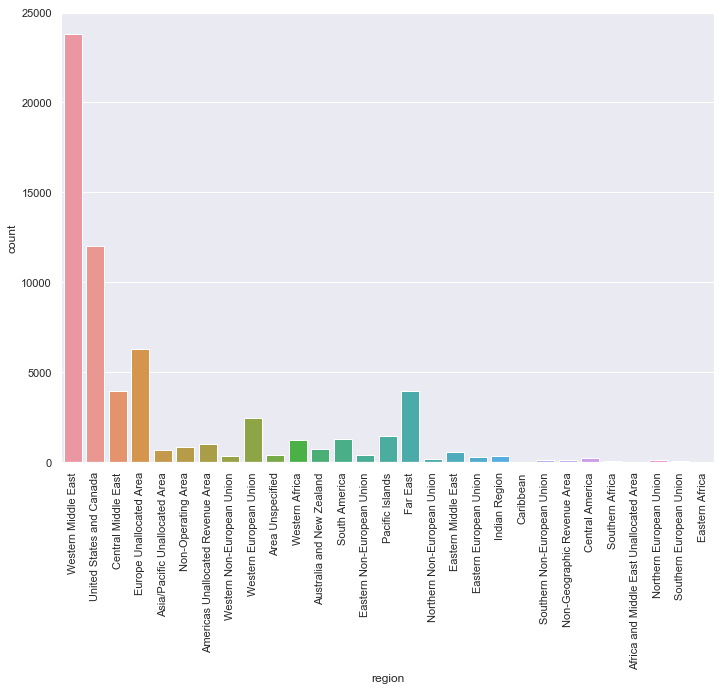

In [74]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.countplot(x="region", data=df)
for item in ax.get_xticklabels():
    item.set_rotation(90)
pylab.rcParams['figure.figsize'] = (30, 10)
pylab.savefig('region.png', dpi=400, bbox_inches = 'tight')

In [75]:
valid = pd.read_excel('valid.xlsx')

In [76]:
valid.head()

,formation_year,holding_long,holding_short,unchange_ret,portfolio_ret,cumulative_valid,cumulative_predict
0,2004,0.18,0.18,0.15,0.00,0.00,-0.04
1,2005,0.09,0.09,0.11,0.00,0.00,0.02
2,2006,0.25,0.20,0.25,0.05,0.05,0.10
3,2007,-0.14,-0.19,-0.14,0.04,0.09,0.17
4,2008,-0.25,-0.24,-0.28,-0.01,0.08,0.15


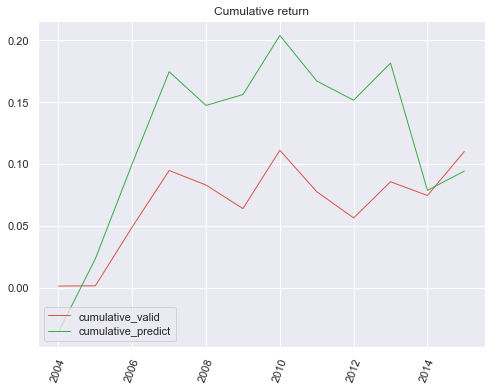

In [78]:
ax_1 = plt.plot(valid['formation_year'],valid['cumulative_valid'], sns.xkcd_rgb["pale red"], lw=1)
ax_2 = plt.plot(valid['formation_year'],valid['cumulative_predict'], sns.xkcd_rgb["medium green"], lw=1)
plt.xticks(rotation=70)
plt.legend(loc=3)
plt.title('Cumulative return')
#plt.show()
pylab.rcParams['figure.figsize'] = (8, 6)
pylab.savefig('Cumulative.png', dpi=400, bbox_inches = 'tight')